In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/FSM_T_V_PlanetScope.zip

In [4]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime,timedelta

In [5]:
def visualize(dataset):
  band1 = dataset.GetRasterBand(6).ReadAsArray() # Red channel
  band2 = dataset.GetRasterBand(4).ReadAsArray() # Green channel
  band3 = dataset.GetRasterBand(2).ReadAsArray() # Blue channel

  img = np.dstack((band1, band2, band3))
  f = plt.figure()
  plt.imshow(img)
  # plt.savefig('Tiff.png')
  plt.show()

['01-02-2023', '01-03-2023', '01-04-2023', '01-05-2023', '01-06-2023', '01-07-2023']
01-02-2023


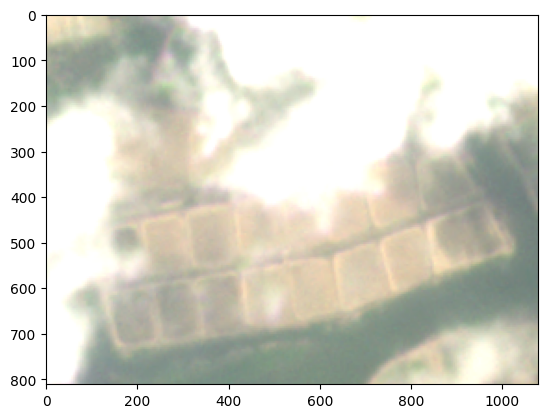

01-03-2023


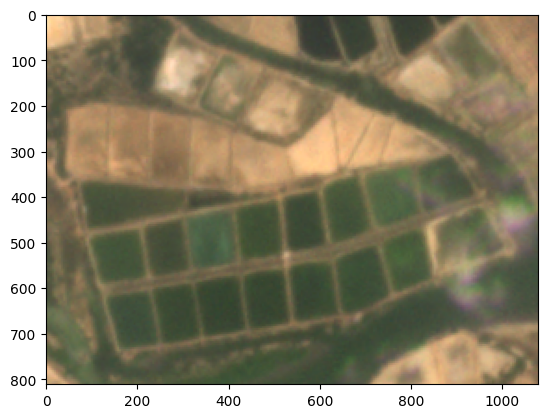

01-04-2023


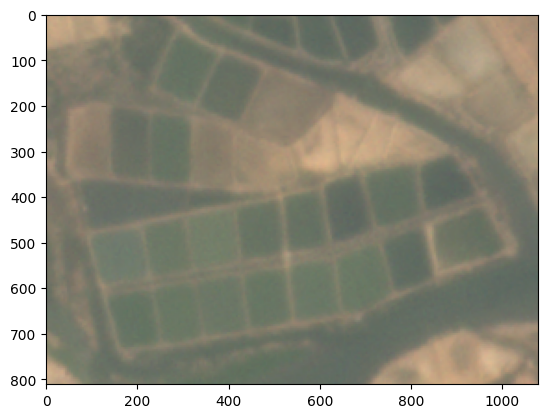

01-05-2023


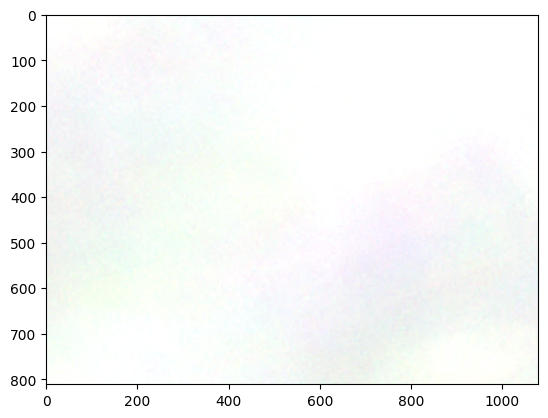

01-06-2023


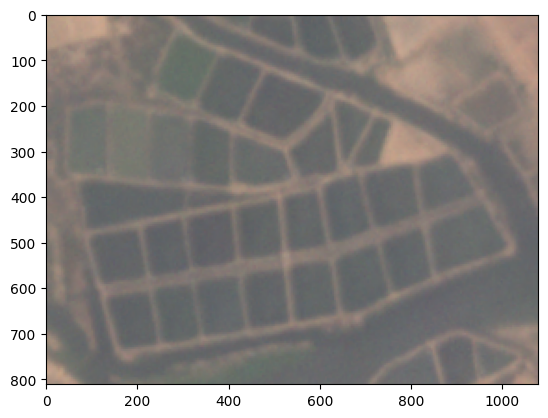

01-07-2023


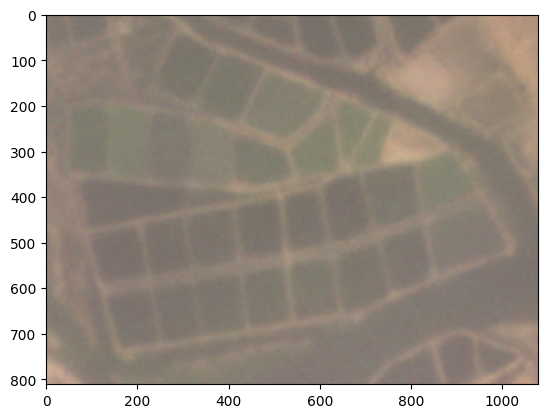

In [6]:
start_date = datetime(2023, 1, 2)
end_date = datetime(2023, 1, 7)
delta = timedelta(days=1)

all_dates = []
current_date = start_date
while current_date <= end_date:
    date_string = current_date.strftime("%m-%d-%Y")
    all_dates.append(date_string)
    # print(date_string)
    current_date += delta
print(all_dates)
for date in  all_dates:
  print(date)
  dataset1  = gdal.Open(f'/content/content/FSM_T_V_PlanetScope/T_{date}.tif')
  visualize(dataset1)


In [184]:
# plt.figure(figsize=(10,10))
# plt.plot(df_sorted.iloc[0], '-o')
# plt.show()

# Working code

In [183]:
df =pd.read_csv('/content/drive/MyDrive/WQA_data/farm-status (1).csv')

newdf = df.set_index('index')
newcol =  newdf.columns
newdf2 = newdf.T

# df_sorted = df.sort_values(by='Date')
newdf2['sortdate'] = pd.to_datetime(newcol,dayfirst=True)
df_sorted = newdf2.sort_values(by='sortdate').drop(['sortdate'],axis =1).T
df_sorted.head()


date_list = df_sorted.columns.values

dictt = {}
for index, row in df_sorted.iterrows():
  count = 0
  statusArray =[None]*(len(df_sorted.columns))
  for d in date_list:
    if row[d] < 20:
      # print("Water", d)
      statusArray[count] = 'Water'
    else:
      # print("dry", d)
      statusArray[count] = 'dry'
    count+=1
  dictt.update({index:statusArray})


statusdict = {}
length = len(df_sorted.columns)

for pond in dictt.keys():
  status = dictt[pond]
  for i,step in enumerate(status):
    # print(i)
    if step == "dry":
      if  status[i+1] =='Water':
        status[i+1] = 'Pumping'
  statusdict.update({pond:status})

for pond in statusdict.keys():
  status = statusdict[pond]
  # print(status)

  for i,step in enumerate(status[:(length-1)]):
    if step == "Pumping" and  status[i+1] =='Water':
      start = i
    if step == "Water" and status[i+1] =='dry':
        end = i
        for j in range(start+1,end+1):
          status[j] = 'Running'
  for i,step in enumerate(status):
    if step == "Water" :
      status[i] = 'Running'
  for i,step in enumerate(status[:length-9]):
    if step == "Pumping" :
      if 'dry' not in status[i:i+9]:
        status[i+2] = 'AreatorPlaced'
        status[i+9] = 'Stocked'

  # print(status)

  statusdict.update({pond:status})


labeleddf = pd.DataFrame(statusdict).T
labeleddf.columns = df_sorted.columns
labeleddf.head()

,01-02-2023,02-02-2023,03-02-2023,04-02-2023,05-02-2023,06-02-2023,07-02-2023,08-02-2023,09-02-2023,10-02-2023,...,05-07-2023,06-07-2023,07-07-2023,08-07-2023,09-07-2023,10-07-2023,11-07-2023,12-07-2023,13-07-2023,14-07-2023
T_B8,Running,dry,Pumping,dry,Pumping,Running,dry,Pumping,dry,dry,...,Running,Running,Running,Running,Running,Running,Running,Running,Running,Running
T_B7,dry,dry,Pumping,dry,dry,dry,Pumping,dry,dry,dry,...,Running,Running,Running,Running,Running,Running,Running,Running,Running,Running
T_B5,dry,dry,Pumping,dry,dry,dry,Pumping,dry,dry,dry,...,Running,Running,Running,Running,Running,Running,Running,Running,Running,Running
T_B6,dry,dry,Pumping,dry,dry,dry,Pumping,dry,dry,dry,...,Running,Running,Running,Running,Running,Running,Running,Running,Running,Running
T_B4,dry,dry,Pumping,dry,dry,dry,Pumping,dry,dry,dry,...,Running,Running,Running,Running,Running,Running,Running,Running,Running,Running
